In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import variable_encode as var_encode
from sklearn.metrics import confusion_matrix,recall_score, auc, roc_curve,precision_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
import warnings
warnings.filterwarnings("ignore") ##忽略警告

# 读取数据

In [2]:
data_train_1 = pd.read_excel('最终2018年改变分箱最后19个特征数据的分箱.xlsx')
data_test_1 = pd.read_excel('最终2019年-1改变分箱最后19个特征数据的分箱.xlsx')
data_test_2 = pd.read_excel('最终2019年-2改变分箱最后19个特征数据的分箱.xlsx')
data_test_3 = pd.read_excel('最终2019年-3改变分箱最后19个特征数据的分箱.xlsx')
data_test_4 = pd.read_excel('最终2019年-4改变分箱最后19个特征数据的分箱.xlsx')

In [3]:
data_train_1 = data_train_1.drop(columns = ['mths_since_recent_inq'])
data_test_1 = data_test_1.drop(columns = ['mths_since_recent_inq'])
data_test_2 = data_test_2.drop(columns = ['mths_since_recent_inq'])
data_test_3 = data_test_3.drop(columns = ['mths_since_recent_inq'])
data_test_4 = data_test_4.drop(columns = ['mths_since_recent_inq'])

In [4]:
 ####取出训练数据与测试数据
var_all = list(data_train_1.columns)
var_all.remove('loan_status')

In [5]:
####变量归一化
scaler = StandardScaler().fit(data_train_1[var_all])
data_train_1[var_all] = scaler.transform(data_train_1[var_all])  
data_test_1[var_all] = scaler.transform(data_test_1[var_all])
data_test_2[var_all] = scaler.transform(data_test_2[var_all])
data_test_3[var_all] = scaler.transform(data_test_3[var_all])
data_test_4[var_all] = scaler.transform(data_test_4[var_all])
    
x_train = np.array(data_train_1[var_all])
y_train = np.array(data_train_1.loan_status)
    
x_test_1 = np.array(data_test_1[var_all])
y_test_1 = np.array(data_test_1.loan_status)

x_test_2 = np.array(data_test_2[var_all])
y_test_2 = np.array(data_test_2.loan_status)

x_test_3 = np.array(data_test_3[var_all])
y_test_3 = np.array(data_test_3.loan_status)

x_test_4 = np.array(data_test_4[var_all])
y_test_4 = np.array(data_test_4.loan_status)    

# 模型训练

In [6]:
DT_model_1 = DecisionTreeClassifier(max_depth = 8,
                                    class_weight={1: 3, 0: 1})

In [7]:
DT_model_fit = DT_model_1.fit(x_train, y_train)

In [8]:
    ##属性
#    DT_model_fit.feature_importances_
#    DT_model_fit.max_features_
#    DT_model_fit.n_outputs_

## 模型预测

In [9]:
y_pred = DT_model_fit.predict(x_train)
y_proba = DT_model_fit.predict_proba(x_train)
y_score_train = DT_model_fit.predict_proba(x_train)[:, 1]

In [10]:
y_pred_1 = DT_model_fit.predict(x_test_1)
y_proba_1 = DT_model_fit.predict_proba(x_test_1)
y_score_test_1 = DT_model_fit.predict_proba(x_test_1)[:, 1]

y_pred_2 = DT_model_fit.predict(x_test_2)
y_proba_2 = DT_model_fit.predict_proba(x_test_2)
y_score_test_2 = DT_model_fit.predict_proba(x_test_2)[:, 1]

y_pred_3 = DT_model_fit.predict(x_test_3)
y_proba_3 = DT_model_fit.predict_proba(x_test_3)
y_score_test_3 = DT_model_fit.predict_proba(x_test_3)[:, 1]

y_pred_4 = DT_model_fit.predict(x_test_4)
y_proba_4 = DT_model_fit.predict_proba(x_test_4)
y_score_test_4 = DT_model_fit.predict_proba(x_test_4)[:, 1]

# 模型评估

## 混淆矩阵

In [11]:
cnf_matrix = confusion_matrix(y_train,y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix

预测为好   预测为坏
标签为好  122159  72544
标签为坏   22896  42550

In [12]:
cnf_matrix1 = confusion_matrix(y_test_1,y_pred_1)
cnf_matrix1 = pd.DataFrame(cnf_matrix1,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix1

预测为好  预测为坏
标签为好  15223  8994
标签为坏   3698  5704

In [13]:
cnf_matrix2 = confusion_matrix(y_test_2,y_pred_2)
cnf_matrix2 = pd.DataFrame(cnf_matrix2,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix2

预测为好  预测为坏
标签为好  15044  9081
标签为坏   3689  5781

In [14]:
cnf_matrix3 = confusion_matrix(y_test_3,y_pred_3)
cnf_matrix3 = pd.DataFrame(cnf_matrix3,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix3

预测为好  预测为坏
标签为好  15477  9071
标签为坏   3654  5590

In [15]:
cnf_matrix4 = confusion_matrix(y_test_4,y_pred_4)
cnf_matrix4 = pd.DataFrame(cnf_matrix4,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix4

预测为好  预测为坏
标签为好  15115  9043
标签为坏   3697  5686

## 评估指标

In [16]:
acc_DT = accuracy_score(y_train,y_pred)
kappa_DT = cohen_kappa_score(y_train,y_pred)
auc_DT = roc_auc_score(y_train, y_score_train)
fpr_DT, tpr_DT, thresholds_roc_DT = roc_curve(y_train,y_score_train)
ks_DT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_DT, fpr_DT)])
results = pd.DataFrame()
results['准确率'] = [acc_DT]
results['AUC'] = [auc_DT]
results['KS值'] = [ks_DT]
results['kappa'] = [kappa_DT]
results.index = ['决策树']
results

准确率       AUC       KS值     kappa
决策树  0.633133  0.694611  0.277567  0.221732

In [17]:
acc_DT = accuracy_score(y_test_1,y_pred_1)
kappa_DT = cohen_kappa_score(y_test_1,y_pred_1)
auc_DT = roc_auc_score(y_test_1, y_score_test_1)
fpr_DT, tpr_DT, thresholds_roc_DT = roc_curve(y_test_1,y_score_test_1)
ks_DT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_DT, fpr_DT)])
results1 = pd.DataFrame()
results1['准确率_1'] = [acc_DT]
results1['AUC_1'] = [auc_DT]
results1['KS值_1'] = [ks_DT]
results1['kappa_1'] = [kappa_DT]
results1.index = ['决策树']
results1

准确率_1     AUC_1    KS值_1   kappa_1
决策树  0.622475  0.670734  0.24722  0.200706

In [18]:
acc_DT = accuracy_score(y_test_2,y_pred_2)
kappa_DT = cohen_kappa_score(y_test_2,y_pred_2)
auc_DT = roc_auc_score(y_test_2, y_score_test_2)
fpr_DT, tpr_DT, thresholds_roc_DT = roc_curve(y_test_2,y_score_test_2)
ks_DT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_DT, fpr_DT)])
results2 = pd.DataFrame()
results2['准确率_2'] = [acc_DT]
results2['AUC_2'] = [auc_DT]
results2['KS值_2'] = [ks_DT]
results2['kappa_2'] = [kappa_DT]
results2.index = ['决策树_2']
results2

准确率_2     AUC_2    KS值_2   kappa_2
决策树_2  0.619884  0.666021  0.24206  0.199533

In [19]:
acc_DT = accuracy_score(y_test_3,y_pred_3)
kappa_DT = cohen_kappa_score(y_test_3,y_pred_3)
auc_DT = roc_auc_score(y_test_3, y_score_test_3)
fpr_DT, tpr_DT, thresholds_roc_DT = roc_curve(y_test_3,y_score_test_3)
ks_DT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_DT, fpr_DT)])
results3 = pd.DataFrame()
results3['准确率_3'] = [acc_DT]
results3['AUC_3'] = [auc_DT]
results3['KS值_3'] = [ks_DT]
results3['kappa_3'] = [kappa_DT]
results3.index = ['决策树']
results3

准确率_3     AUC_3     KS值_3   kappa_3
决策树  0.623432  0.664137  0.240116  0.198869

In [20]:
acc_DT = accuracy_score(y_test_4,y_pred_4)
kappa_DT = cohen_kappa_score(y_test_4,y_pred_4)
auc_DT = roc_auc_score(y_test_4, y_score_test_4)
fpr_DT, tpr_DT, thresholds_roc_DT = roc_curve(y_test_4,y_score_test_4)
ks_DT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_DT, fpr_DT)])
results4 = pd.DataFrame()
results4['准确率_4'] = [acc_DT]
results4['AUC_4'] = [auc_DT]
results4['KS值_4'] = [ks_DT]
results4['kappa_4'] = [kappa_DT]
results4.index = ['决策树']
results4

准确率_4     AUC_4     KS值_4   kappa_4
决策树  0.620166  0.666347  0.237422  0.197289

In [21]:
acc1=[results1['准确率_1'],results2['准确率_2'],results3['准确率_3'],results4['准确率_4']]
ac1=np.mean(acc1)
bc1=np.std(acc1)

In [22]:
acc2=[results1['AUC_1'],results2['AUC_2'],results3['AUC_3'],results4['AUC_4']]
ac2=np.mean(acc2)
bc2=np.std(acc2)

In [23]:
acc3=[results1['KS值_1'],results2['KS值_2'],results3['KS值_3'],results4['KS值_4']]
ac3=np.mean(acc3)
bc3=np.std(acc3)

In [24]:
acc4=[results1['kappa_1'],results2['kappa_2'],results3['kappa_3'],results4['kappa_4']]
ac4=np.mean(acc4)
bc4=np.std(acc4)

In [25]:
results11 =pd.DataFrame({'准确率的均值':{'决策树':ac1},'准确率的方差':{'决策树':bc1},
                   'AUC的均值':{'决策树':ac2},'KS值的均值':{'决策树':ac3},
                   'kappa的均值':{'决策树':ac4}})
results11

准确率的均值    准确率的方差   AUC的均值    KS值的均值  kappa的均值
决策树  0.621489  0.001506  0.66681  0.241705  0.199099

## ROC和KS曲线

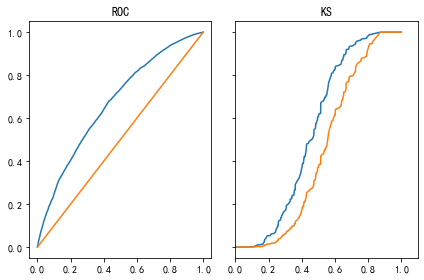

In [26]:
y_proba_DT_1= y_proba_1
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr,tpr,thresholds = roc_curve(y_test_1,y_proba_DT_1[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

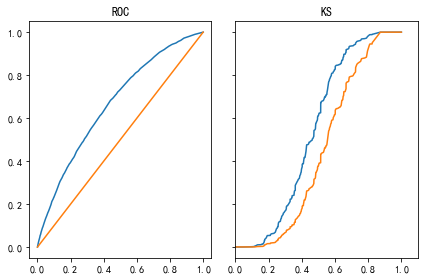

In [27]:
y_proba_DT_2= y_proba_2
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_2))):
    fpr,tpr,thresholds = roc_curve(y_test_2,y_proba_DT_2[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

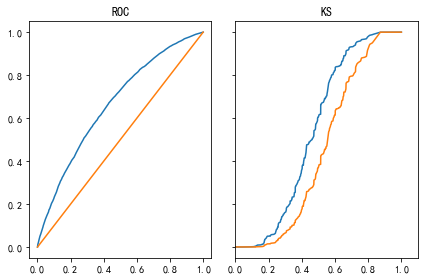

In [28]:
y_proba_DT_3= y_proba_3
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_3))):
    fpr,tpr,thresholds = roc_curve(y_test_3,y_proba_DT_3[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

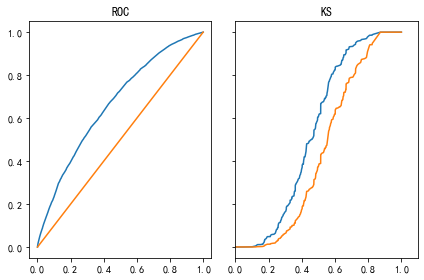

In [29]:
y_proba_DT_4= y_proba_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_4))):
    fpr,tpr,thresholds = roc_curve(y_test_4,y_proba_DT_4[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

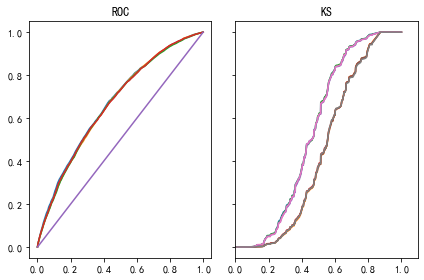

In [30]:
y_proba_DT_1= y_proba_1
y_proba_DT_2= y_proba_2
y_proba_DT_3= y_proba_3
y_proba_DT_4= y_proba_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr_1,tpr_1,thresholds_1 = roc_curve(y_test_1,y_proba_DT_1[:,i],pos_label = i)
for i in range(len(np.unique(y_test_2))):
    fpr_2,tpr_2,thresholds_2 = roc_curve(y_test_2,y_proba_DT_2[:,i],pos_label = i)
for i in range(len(np.unique(y_test_3))):
    fpr_3,tpr_3,thresholds_3 = roc_curve(y_test_3,y_proba_DT_3[:,i],pos_label = i)
for i in range(len(np.unique(y_test_4))):
    fpr_4,tpr_4,thresholds_4 = roc_curve(y_test_4,y_proba_DT_4[:,i],pos_label = i)    
axe1.plot(fpr_1,tpr_1)
axe1.plot(fpr_2,tpr_2)
axe1.plot(fpr_3,tpr_3)
axe1.plot(fpr_4,tpr_4)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds_1,tpr_1,label = 'TPR')
axe2.plot(1 - thresholds_1,fpr_1,label = 'FPR')
axe2.plot(1 - thresholds_2,tpr_2,label = 'TPR')
axe2.plot(1 - thresholds_2,fpr_2,label = 'FPR')
axe2.plot(1 - thresholds_3,tpr_3,label = 'TPR')
axe2.plot(1 - thresholds_3,fpr_3,label = 'FPR')
axe2.plot(1 - thresholds_4,tpr_4,label = 'TPR')
axe2.plot(1 - thresholds_4,fpr_4,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

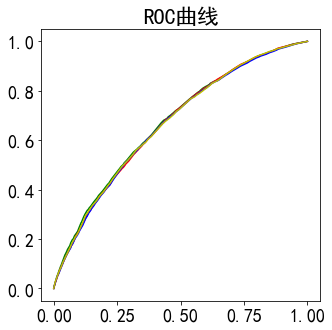

In [31]:
import matplotlib.font_manager as fm
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('ROC曲线')
plt.plot(fpr_1,tpr_1,color='g',label="ROC_1")
plt.plot(fpr_2,tpr_2,color='r',label="ROC_2")
plt.plot(fpr_3,tpr_3,color='b',label="ROC_3")
plt.plot(fpr_4,tpr_4,color='y',label="ROC_4")
plt.show()

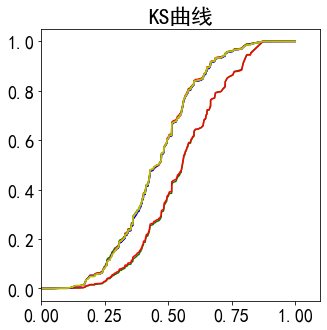

In [32]:
import matplotlib.font_manager as fm
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('KS曲线')
plt.plot(1 - thresholds_1,tpr_1,color='g',label='TPR')
plt.plot(1 - thresholds_1,fpr_1,color='g',label='FPR')
plt.plot(1 - thresholds_2,tpr_2,color='r',label='TPR')
plt.plot(1 - thresholds_2,fpr_2,color='r',label='FPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='TPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='FPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='TPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='FPR')
plt.xlim(0,)
plt.show()

##  k折交叉检验

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore") ##忽略警告

In [34]:
#ef muti_score(model):
warnings.filterwarnings('ignore')
accuracy = cross_val_score(DT_model_1, x_train, y_train, scoring='accuracy', cv=5)
acc_mean=accuracy.mean()
acc_std=accuracy.std()
results = pd.DataFrame()
results["准确率均值"] = [acc_mean]
results["准确率标准差"] = [acc_std]
results.index = ['决策树']
results
#rint("准确率均值",accuracy.mean())
#rint("准确率方差",accuracy.var())

准确率均值    准确率标准差
决策树  0.619837  0.009803

## 模型psi计算

In [35]:
def cal_psi(actual, predict, bins=10):
    actual_min = actual.min()  # 实际中的最小概率
    actual_max = actual.max()  # 实际中的最大概率
    binlen = (actual_max - actual_min) / bins
    cuts = [actual_min + i * binlen for i in range(1, bins)]#设定分组
    cuts.insert(0, -float("inf"))
    cuts.append(float("inf"))
    actual_cuts = np.histogram(actual, bins=cuts)#将actual等宽分箱
    predict_cuts = np.histogram(predict, bins=cuts)#将predict按actual的分组等宽分箱
    actual_df = pd.DataFrame(actual_cuts[0],columns=['actual'])
    predict_df = pd.DataFrame(predict_cuts[0], columns=['predict'])
    psi_df = pd.merge(actual_df,predict_df,right_index=True,left_index=True)
    psi_df['actual_rate'] = (psi_df['actual'] + 1) / psi_df['actual'].sum()#计算占比，分子加1，防止计算PSI时分子分母为0
    psi_df['predict_rate'] = (psi_df['predict'] + 1) / psi_df['predict'].sum()
    psi_df['psi'] = (psi_df['actual_rate'] - psi_df['predict_rate']) * np.log(
        psi_df['actual_rate'] / psi_df['predict_rate'])
    psi = psi_df['psi'].sum()
    return psi, psi_df

In [36]:
psi_values11=cal_psi(y_proba[:,1], y_proba_1[:,1],10)
psi_values11

(0.0016919546144462108,
    actual  predict  actual_rate  predict_rate       psi
 0      48        6     0.000188      0.000208  0.000002
 1   11656     1481     0.044809      0.044082  0.000012
 2   30449     3969     0.117048      0.118088  0.000009
 3   35434     4642     0.136210      0.138106  0.000026
 4   52480     6840     0.201734      0.203486  0.000015
 5   51797     6957     0.199109      0.206966  0.000304
 6   42624     5478     0.163848      0.162973  0.000005
 7   26407     3211     0.101511      0.095541  0.000362
 8    7662      892     0.029456      0.026562  0.000299
 9    1592      143     0.006123      0.004283  0.000658)

In [37]:
psi_values12=cal_psi(y_proba[:,1], y_proba_2[:,1],10)
psi_values12

(0.001111309888059464,
    actual  predict  actual_rate  predict_rate           psi
 0      48        4     0.000188      0.000149  9.307615e-06
 1   11656     1534     0.044809      0.045691  1.720726e-05
 2   30449     3929     0.117048      0.116982  3.792097e-08
 3   35434     4575     0.136210      0.136211  8.644672e-13
 4   52480     6655     0.201734      0.198125  6.517330e-05
 5   51797     6998     0.199109      0.208335  4.178555e-04
 6   42624     5522     0.163848      0.164399  1.850194e-06
 7   26407     3287     0.101511      0.097872  1.328735e-04
 8    7662      934     0.029456      0.027832  9.217587e-05
 9    1592      157     0.006123      0.004703  3.748287e-04)

In [38]:
psi_values13=cal_psi(y_proba[:,1], y_proba_3[:,1],10)
psi_values13

(0.0022289641263661354,
    actual  predict  actual_rate  predict_rate       psi
 0      48        6     0.000188      0.000207  0.000002
 1   11656     1603     0.044809      0.047467  0.000153
 2   30449     3942     0.117048      0.116684  0.000001
 3   35434     4687     0.136210      0.138731  0.000046
 4   52480     6878     0.201734      0.203569  0.000017
 5   51797     6868     0.199109      0.203273  0.000086
 6   42624     5552     0.163848      0.164329  0.000001
 7   26407     3239     0.101511      0.095881  0.000321
 8    7662      895     0.029456      0.026515  0.000309
 9    1592      122     0.006123      0.003640  0.001292)

In [39]:
psi_values14=cal_psi(y_proba[:,1], y_proba_4[:,1],10)
psi_values14

(0.0022011226915426745,
    actual  predict  actual_rate  predict_rate           psi
 0      48        5     0.000188      0.000179  4.883135e-07
 1   11656     1637     0.044809      0.048836  3.465281e-04
 2   30449     3982     0.117048      0.118750  2.456711e-05
 3   35434     4414     0.136210      0.131630  1.566801e-04
 4   52480     6734     0.201734      0.200799  4.347048e-06
 5   51797     6967     0.199109      0.207746  3.667404e-04
 6   42624     5520     0.163848      0.164605  3.481133e-06
 7   26407     3291     0.101511      0.098149  1.132691e-04
 8    7662      840     0.029456      0.025074  7.059232e-04
 9    1592      151     0.006123      0.004532  4.790981e-04)

In [40]:
bcc2=[psi_values11[0],psi_values12[0],psi_values13[0],psi_values14[0]]
bbc2=np.mean(bcc2)
bbc2

0.0018083378301036212

In [41]:
results111 =pd.DataFrame({'PSI':{'决策树':bbc2},'PSI_1':{'决策树':psi_values11[0]},'PSI_2':{'决策树':psi_values12[0]},
                   'PSI_3':{'决策树':psi_values13[0]},'PSI_4':{'决策树':psi_values14[0]}})
results111

PSI     PSI_1     PSI_2     PSI_3     PSI_4
决策树  0.001808  0.001692  0.001111  0.002229  0.002201